# Digital Signal Processing

### MsCV - ViBOT - MAIA

The reasons to convert signals into frequency domain is to get the idea of different frequency components it is composed of. This might help to detect the required signals and classify them, for examples, speak or speech recognition from a sound wave, noise removal from the image, or finding recurring patterns within images. 

In [103]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np
from skimage import io
from skimage import img_as_float
from matplotlib import cm
from scipy.stats import norm
from scipy import signal


Pretty printing has been turned ON


# Discrete Fourier Transform
The Discrete Fourier Transform (DFT) converts discrete data from a time domain into frequency domain. The DFT analyzes the finite segment in one period of an infinitely extended periodic signal, which is defined as: 
$$ X[n] = \sum^{N-1}_{k = 0} x[k] e^{-j(2\pi/N)kn}$$


Note: The Fast Fourier Transform (FFT) is simply an algorithm to compute the DFT in a faster way!

## Exercise 1 -  ** DFT** 
**1.1** The DFT of a $5$ Hz sin wave sampled with the sampling of $f_s = 50$ Hz over 1000 (N = 1000) samples is computed as follows:


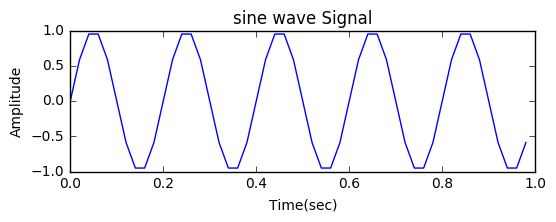

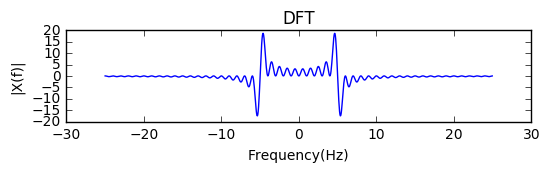

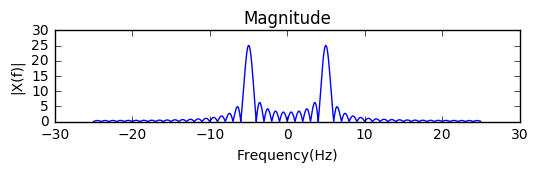

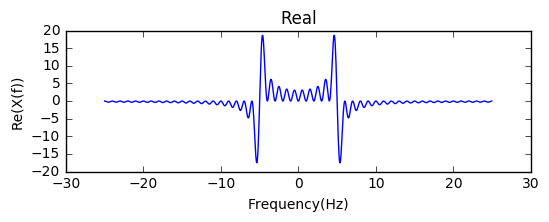

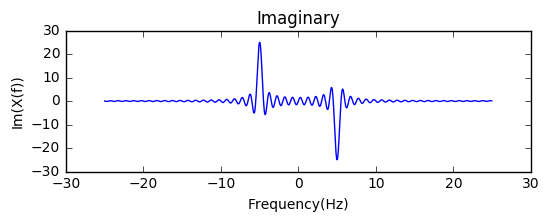

In [104]:
#create a cosine wave with 1000 samples
# Signal frequency and sampling frequency
f = 5.
fs = 50.
# time vector for one second
t = np.arange(0, 1., 1./fs)
# sin wave 
x_n = np.sin(2*np.pi*f*t)
# Number of samples 
N = 1000
# frequency vector
fr = (np.arange(-N/2,N/2,1)) * fs/N
# DFT 
# Using fftshift to have the center frequency 
x_f = np.fft.fftshift(np.fft.fft(x_n, N))
#x_f = x_f[0:N/2]

plt.figure
plt.subplot(211)
plt.plot(t, x_n)
plt.title('sine wave Signal')
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.show()

plt.subplot(312)
plt.plot(fr, x_f)
plt.title('DFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

plt.subplot(313)
plt.plot(fr, np.abs(x_f))
plt.title('Magnitude')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

plt.figure
plt.subplot(211)
plt.plot(fr, np.real(x_f))
plt.title('Real')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Re(X(f))')
plt.show()

plt.subplot(212)
plt.plot(fr, np.imag(x_f))
plt.title('Imaginary')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Im(X(f))')
plt.show()

**1.2** Compute the DFT of a cosine wave, how that differs from that of a sine wave ?

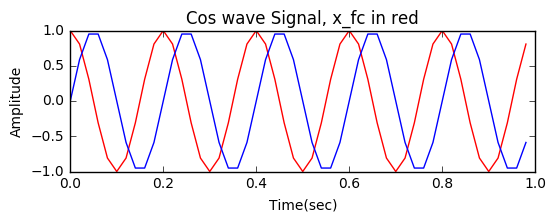

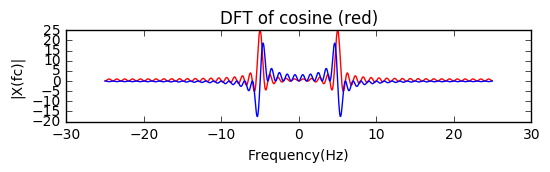

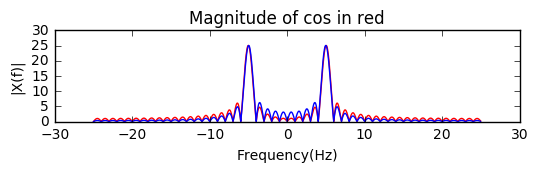

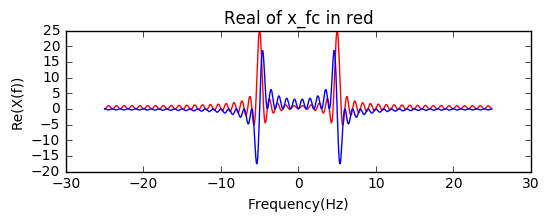

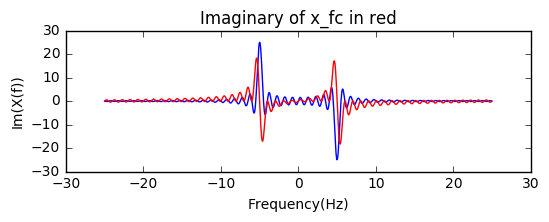

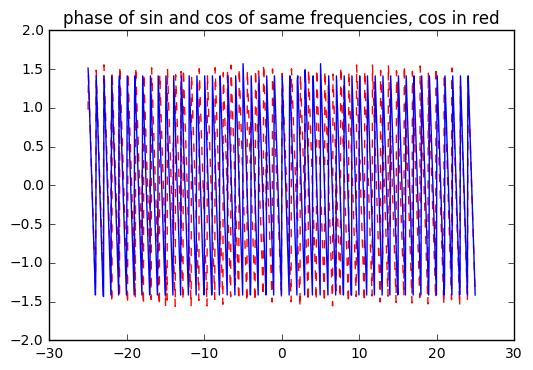

In [105]:
# Signal frequency and sampling frequency
f = 5.
fs = 50.
# time vector for one second
t = np.arange(0, 1., 1./fs)
# sin wave 
x_nc = np.cos(2*np.pi*f*t)
# Number of samples 
N = 1000
# frequency vector
fr = (np.arange(-N/2,N/2,1)) * fs/N
# DFT 
# Using fftshift to have the center frequency 
x_fc = np.fft.fftshift(np.fft.fft(x_nc, N))

x_pc = np.arctan(np.imag(x_fc)/np.real(x_fc))
x_p = np.arctan(np.imag(x_f)/np.real(x_f))
#x_f = x_f[0:N/2]

plt.figure
plt.subplot(211)
plt.plot(t, x_nc, 'r')
plt.title('Cos wave Signal, x_fc in red')
plt.plot(t, x_n)
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.show()

plt.subplot(312)
plt.plot(fr, x_fc, 'r')
plt.plot(fr, x_f)
plt.title('DFT of cosine (red)')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(fc)|')
plt.show()

plt.subplot(313)
plt.plot(fr, np.abs(x_fc), 'r')
plt.plot(fr, np.abs(x_f))
plt.title('Magnitude of cos in red')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

plt.figure
plt.subplot(211)
plt.plot(fr, np.real(x_fc), 'r')
plt.plot(fr, np.real(x_f))
plt.title('Real of x_fc in red')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Re(X(f))')
plt.show()

plt.subplot(212)
plt.plot(fr, np.imag(x_f))
plt.plot(fr, np.imag(x_fc), 'r')
plt.title('Imaginary of x_fc in red')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Im(X(f))')
plt.show()

plt.figure()
plt.plot(fr, x_pc, 'r--')
plt.plot(fr, x_p)
plt.title('phase of sin and cos of same frequencies, cos in red')
plt.show()
#Since sin and cos signals of same frequency and amplitde are identical 
#except for a difference in phase,
#we can expect their fourier transforms to be identical except for a 
#factor which is a polar quantity with unit magnitude and angle negative
#of the phase delay angle. 
#This implies that the two transforms have the same magnitudes. We 
#may notice that the magnitudes of cos and sin signals are almost 
#identical (same peak locations, since we have created sin and cos
#signals of same frequencies).
#The effect of delay appears in the phase plot. We can see that the 
#phase difference between cos and sin waves of same frequency manifests
#as the phase difference between the phase plots of the two signals

**1.3** Use square wave using the same frequncy and sampling frequency.

Note use `signal.square` to create your signal. 

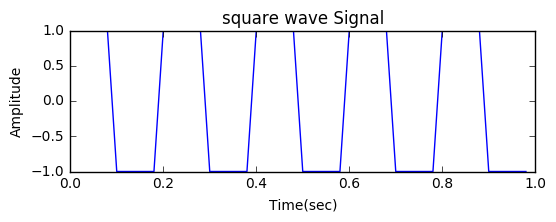

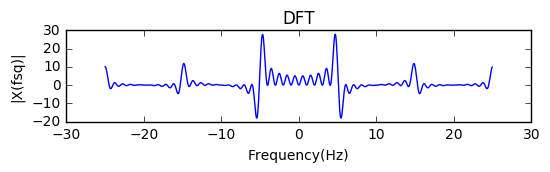

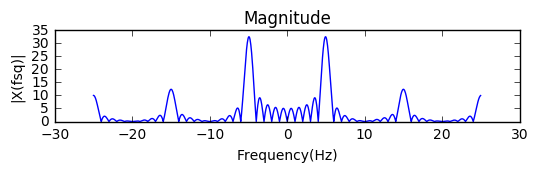

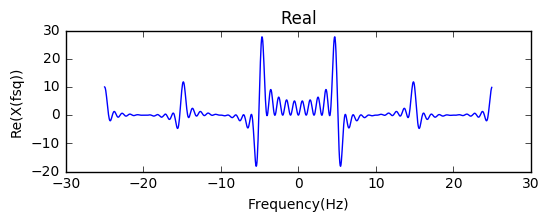

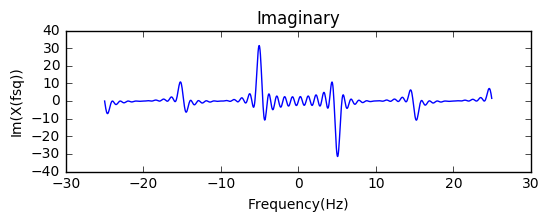

In [106]:
# Signal frequency and sampling frequency
f = 5.
fs = 50.
# time vector for one second
t = np.arange(0, 1., 1./fs)
# square signal 
duty = 0.5
x_nsq = signal.square(2*np.pi*f*t, duty)
# Number of samples 
N = 1000
# frequency vector
fr = (np.arange(-N/2,N/2,1)) * fs/N
# DFT 
# Using fftshift to have the center frequency 
x_fsq = np.fft.fftshift(np.fft.fft(x_nsq, N))
#x_f = x_f[0:N/2]

plt.figure
plt.subplot(211)
plt.plot(t, x_nsq)
plt.title('square wave Signal')
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.show()

plt.subplot(312)
plt.plot(fr, x_fsq)
plt.title('DFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(fsq)|')
plt.show()

plt.subplot(313)
plt.plot(fr, np.abs(x_fsq))
plt.title('Magnitude')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(fsq)|')
plt.show()

plt.figure
plt.subplot(211)
plt.plot(fr, np.real(x_fsq))
plt.title('Real')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Re(X(fsq))')
plt.show()

plt.subplot(212)
plt.plot(fr, np.imag(x_fsq))
plt.title('Imaginary')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Im(X(fsq))')
plt.show()


**1.4** Use white Gaussian noise N = 10000. 

(Note use `np.random.normal` to create your noise) 

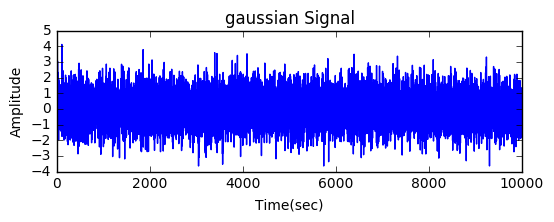

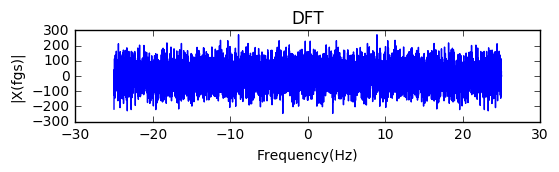

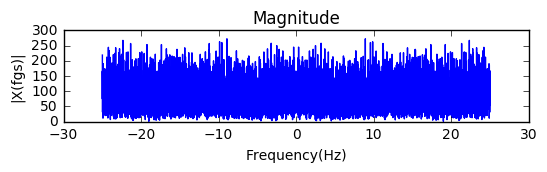

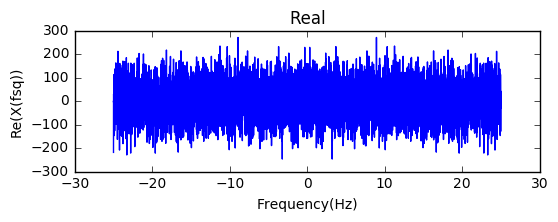

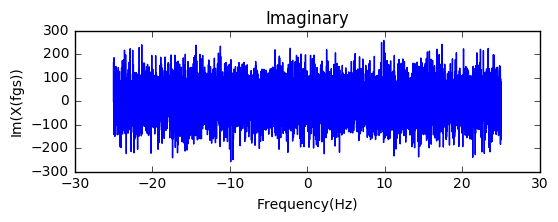

In [107]:
mu = 0.0
sigma = 1.0
N = 10000
x_ngs = np.random.normal(mu, sigma, N)

# frequency vector
fr = (np.arange(-N/2,N/2,1)) * fs/N
# DFT 
# Using fftshift to have the center frequency 
x_fgs = np.fft.fftshift(np.fft.fft(x_ngs, N))

plt.figure
plt.subplot(211)
plt.plot(range(0, N), x_ngs)
plt.title('gaussian Signal')
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.show()

plt.subplot(312)
plt.plot(fr, x_fgs)
plt.title('DFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(fgs)|')
plt.show()

plt.subplot(313)
plt.plot(fr, np.abs(x_fgs))
plt.title('Magnitude')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(fgs)|')
plt.show()

plt.figure
plt.subplot(211)
plt.plot(fr, np.real(x_fgs))
plt.title('Real')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Re(X(fsq))')
plt.show()

plt.subplot(212)
plt.plot(fr, np.imag(x_fgs))
plt.title('Imaginary')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Im(X(fgs))')
plt.show()


## Exercise 2 -  Sampling 

Generate and display the following signals of 1 sec duration.
$$x[n] = 3 cos(2\pi\frac{f_{1}}{f_{s}}n) + 4 sin(2\pi\frac{f_{2}}{f_{s}}n)$$
for $f_{1} = 5$ Hz and $f_{2} = 20$ Hz, sampled with the sampling frequencies of $f_{s} = [10, 20, 25, 40, 50, 100, 150]$


**2.1** Plot $x[n]$ for different sampling frequencies in time domain.

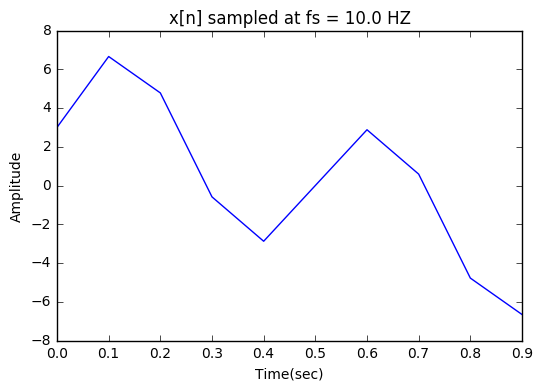

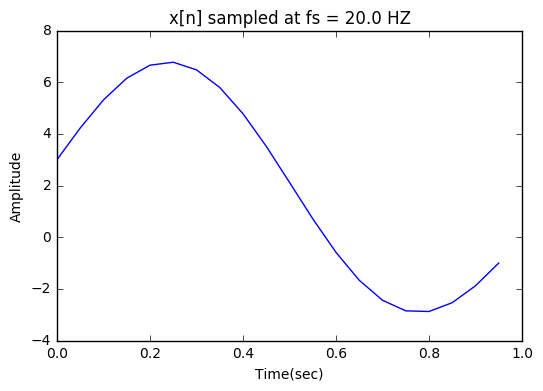

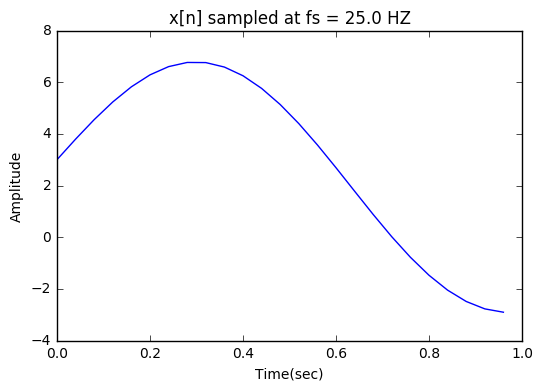

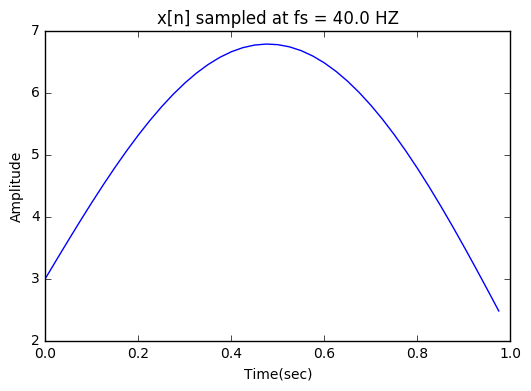

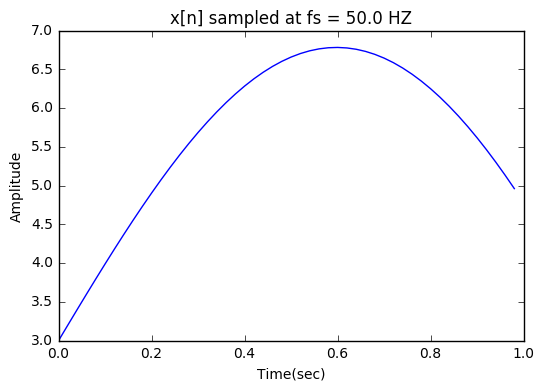

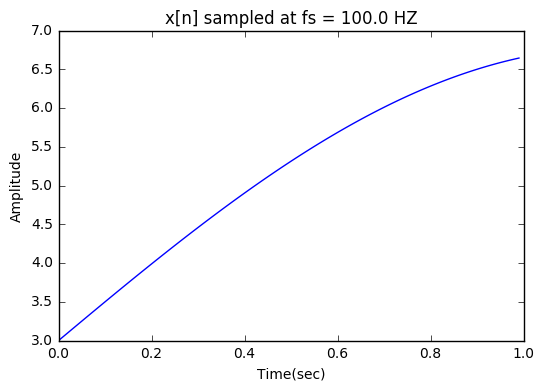

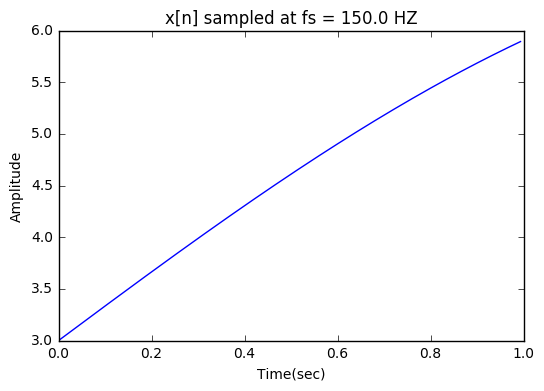

In [108]:


#x_n1 = 3*np.cos(2*np.pi*f1/fs*t) + 4 * np.sin(2*np.pi*f2/fs*t)

#create a cosine wave with 1000 samples
# Signal frequency and sampling frequency
f1 = 5.0
f2 = 20.0

fs1 = 10.0
fs2 = 20.0
fs3 = 25.0
fs4 = 40.0
fs5 = 50.0
fs6 = 100.0
fs7 = 150.0

# time vectors for one second
t1 = np.arange(0, 1., 1./fs1)
t2 = np.arange(0, 1., 1./fs2)
t3 = np.arange(0, 1., 1./fs3)
t4 = np.arange(0, 1., 1./fs4)
t5 = np.arange(0, 1., 1./fs5)
t6 = np.arange(0, 1., 1./fs6)
t7 = np.arange(0, 1., 1./fs7)

# store different x[n]'s 
x_n1 = 3.0*np.cos(2.0*np.pi*(f1/fs1)*t1) + 4.0 * np.sin(2.0*np.pi*(f2/fs1)*t1)
x_n2 = 3.0*np.cos(2.0*np.pi*(f1/fs2)*t2) + 4.0 * np.sin(2.0*np.pi*(f2/fs2)*t2)
x_n3 = 3.0*np.cos(2.0*np.pi*(f1/fs3)*t3) + 4.0 * np.sin(2.0*np.pi*(f2/fs3)*t3)
x_n4 = 3.0*np.cos(2.0*np.pi*(f1/fs4)*t4) + 4.0 * np.sin(2.0*np.pi*(f2/fs4)*t4)
x_n5 = 3.0*np.cos(2.0*np.pi*(f1/fs5)*t5) + 4.0 * np.sin(2.0*np.pi*(f2/fs5)*t5)
x_n6 = 3.0*np.cos(2.0*np.pi*(f1/fs6)*t6) + 4.0 * np.sin(2.0*np.pi*(f2/fs6)*t6)
x_n7 = 3.0*np.cos(2.0*np.pi*(f1/fs7)*t7) + 4.0 * np.sin(2.0*np.pi*(f2/fs7)*t7)


# Number of samples 
N = 1000.00
# frequency vectors
fr1 = (np.arange(-N/2,N/2,1)) * fs1/N
fr2 = (np.arange(-N/2,N/2,1)) * fs2/N
fr3 = (np.arange(-N/2,N/2,1)) * fs3/N
fr4 = (np.arange(-N/2,N/2,1)) * fs4/N
fr5 = (np.arange(-N/2,N/2,1)) * fs5/N
fr6 = (np.arange(-N/2,N/2,1)) * fs6/N
fr7 = (np.arange(-N/2,N/2,1)) * fs7/N

#display the same signal sampled at different rates
plt.figure
plt.plot(t1, x_n1)
plt.title('x[n] sampled at fs = {} HZ'.format(fs1) )
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.show()

plt.figure
plt.plot(t2, x_n2)
plt.title('x[n] sampled at fs = {} HZ'.format(fs2) )
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.show()

plt.figure
plt.plot(t3, x_n3)
plt.title('x[n] sampled at fs = {} HZ'.format(fs3) )
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.show()

plt.figure
plt.plot(t4, x_n4)
plt.title('x[n] sampled at fs = {} HZ'.format(fs4) )
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.show()

plt.figure
plt.plot(t5, x_n5)
plt.title('x[n] sampled at fs = {} HZ'.format(fs5) )
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.show()

plt.figure
plt.plot(t6, x_n6)
plt.title('x[n] sampled at fs = {} HZ'.format(fs6) )
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.show()

plt.figure
plt.plot(t7, x_n7)
plt.title('x[n] sampled at fs = {} HZ'.format(fs7) )
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.show()

**2.2.** Discuss the aliasing effects in the time domain:

**2.3** Compute the FFT of the above signals and display their centered frequency components.
Discuss your observations.

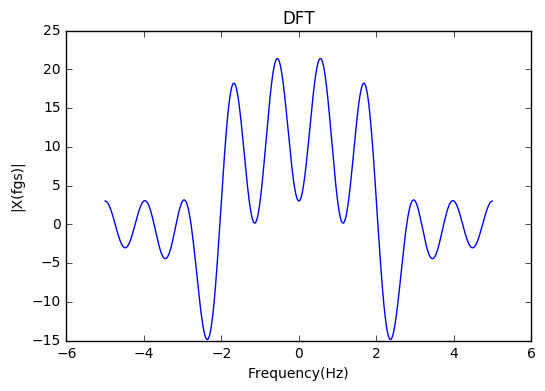

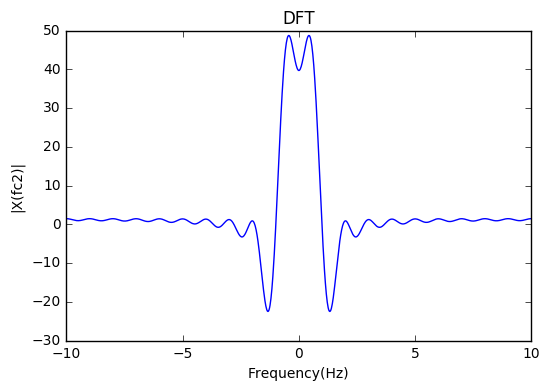

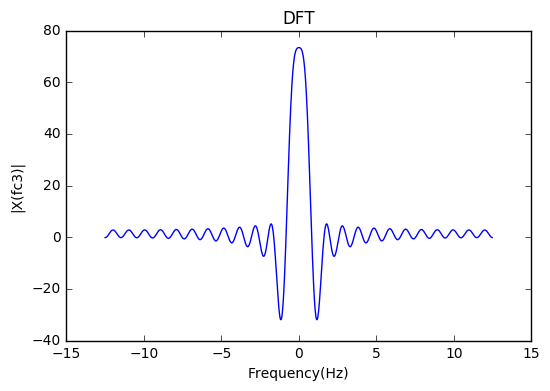

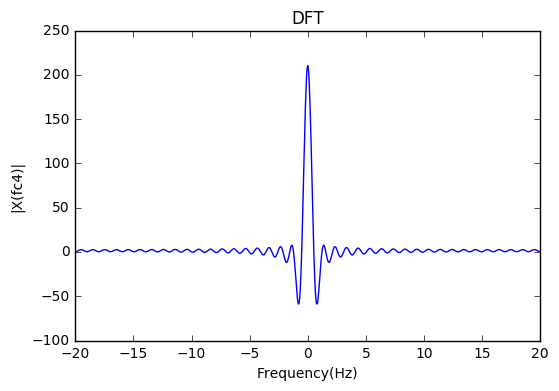

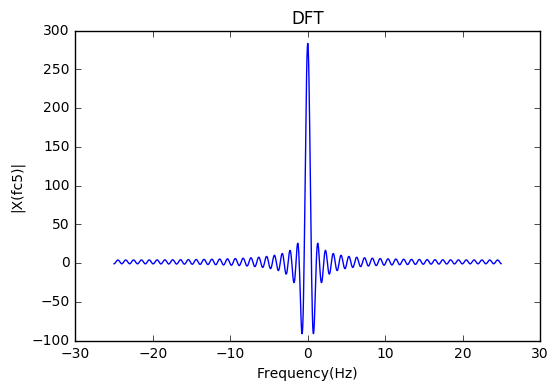

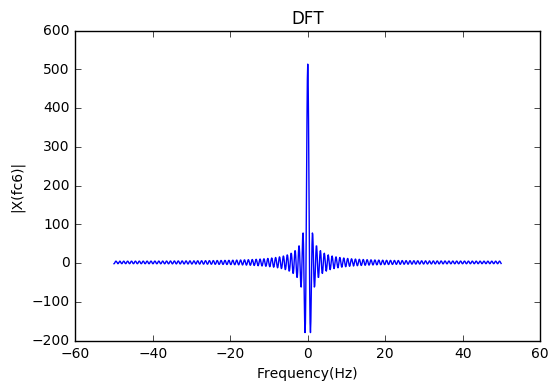

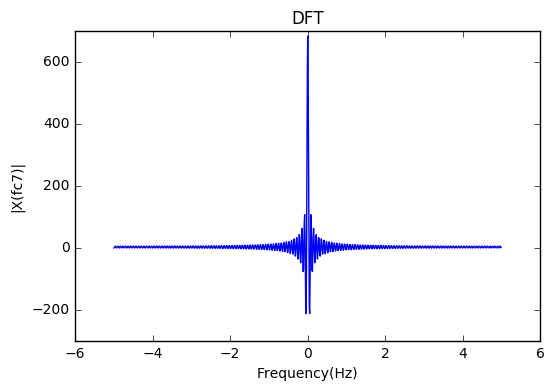

In [109]:
# DFT 
# Using fftshift to have the center frequency 
x_fc1 = np.fft.fftshift(np.fft.fft(x_n1, N))
x_fc2 = np.fft.fftshift(np.fft.fft(x_n2, N))
x_fc3 = np.fft.fftshift(np.fft.fft(x_n3, N))
x_fc4 = np.fft.fftshift(np.fft.fft(x_n4, N))
x_fc5 = np.fft.fftshift(np.fft.fft(x_n5, N))
x_fc6 = np.fft.fftshift(np.fft.fft(x_n6, N))
x_fc7 = np.fft.fftshift(np.fft.fft(x_n7, N))

plt.plot(fr1, x_fc1)
plt.title('DFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(fgs)|')
plt.show()

plt.plot(fr2, x_fc2)
plt.title('DFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(fc2)|')
plt.show()

plt.plot(fr3, x_fc3)
plt.title('DFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(fc3)|')
plt.show()

plt.plot(fr4, x_fc4)
plt.title('DFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(fc4)|')
plt.show()

plt.plot(fr5, x_fc5)
plt.title('DFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(fc5)|')
plt.show()

plt.plot(fr6, x_fc6)
plt.title('DFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(fc6)|')
plt.show()

plt.plot(fr1, x_fc7)
plt.title('DFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(fc7)|')
plt.show()

#Discussion:
#In all the signals x1 through x7, the highest freqeuncy component is of 20/fs Hz. As we increase fs,
#the maximum frequency contained in the signal decreases. This in turn implies that a smaller sampling frequency
#can be used to sample the signal without aliasing. We, however, use larger sampling frequencies while 
#we decrease the maximum frequency of the signal.

#20/10 = 2, 20/20 = 1, 20/25 = 0.8,  20/40 = 0.5 are the maximum frequencies contained in X_n1, x_n2, x_n3 
#and x_n4. We may notice that because in these and all other cases, the sampling frequency is far greater 
#than that required by shannon's theorem, and we see no aliasing. 

#What we can notice is that all the spectra look like the compressed version of the first one. This is because
#as we increase the sampling frequency, the two frequencies 5/fs and 20/fs, come closer. In fact, because our 
#frequencies correspond to discrete frequencies, these two frequencies eventually overlap and we see only a single
#peak. 


## Exercise 3 - 1D  DFT for image classification

1D DFT can be applied to analyze the frequency components along the one dimensional profile of an image. Here we want to use these information to classify the images into two different classes (**barcode** and **non-barcode** classes)
To do so we first 
* Load the images from 1D-DFT folder
    * **3.1** you have to normalize and resize the images to the smallest size 
    * **3.2** Take 1D profile as shown in the example and compute its DFT.
![](profile1.png)
    
    * **3.3** Separate the images to two different groups of **barcode** and **non-barcode** based on their frequency spectrum of their profile 
* Some information regarding the images:
    * There are 54 images while Images [1, 2, 6, 44:54] are barcode images and the others are similar patterns.
    
**3.4** Discuss your results

In [110]:
#function for performing N-point DFT
def myDFT(signal):
    x_n = signal
    
    # Number of samples 
    N = len(signal)
    
    # DFT: Using fftshift to have the center frequency 
    x_f = np.fft.fftshift(np.fft.fft(x_n, N))

    return(x_f)

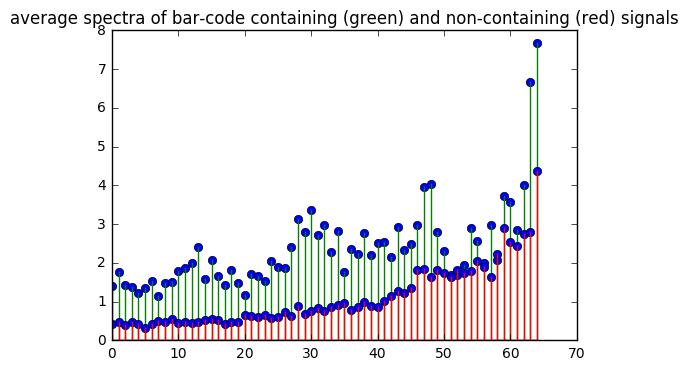

('Bar code present in Image', 1)
('Bar code present in Image', 2)
('Bar code present in Image', 6)
('Bar code present in Image', 43)
('Bar code present in Image', 44)
('Bar code present in Image', 45)
('Bar code present in Image', 47)
('Bar code present in Image', 48)
('Bar code present in Image', 49)
('Bar code present in Image', 50)
('Bar code present in Image', 51)
('Bar code present in Image', 53)
('Bar code present in Image', 54)


In [111]:
Path = '../images/1D-DFT/'
import os, os.path
from skimage.filters import threshold_otsu, rank
from skimage import color
from scipy import misc
from skimage.transform import resize
import time
from scipy.stats import pearsonr

filenames = sorted([f for f in os.listdir(Path)])

#smallest dimensions found by iterating through all images
mMin = 66
nMin = 131
nImages = 54
mMid = mMin/2 
barImages = [1,2,6,44,45,46,47,48,49,50,51,52,53,54]

Imgr = np.zeros((mMin, nMin))

ffts = np.zeros((nImages, nMin/2))

counter = 1
for f in filenames:
    Img = io.imread(os.path.join(Path,f))
    
    #normalize the image
    imgMax = np.max(Img)
    Img = Img/(1.0*imgMax)

    #convert rgb image to grayscale
    Img = color.rgb2gray(Img)

    #apply otsu threshold to binarize image
    Img_bin = Img >= threshold_otsu(Img)
  
    #resize to smallest dimensions
    Imgr = resize(Img, (mMin, nMin))

    #consider the middle row as signal
    signal = Imgr[mMid,:]

    #get DFT
    sig_fft = myDFT(signal)
    
    #consider only half of DFT since coefficients are periodic
    sig_f = sig_fft[0:nMin/2]
    ffts[counter-1,:] = np.abs(sig_f)
    
    #compute phase-spectrum of signal
    sig_phase = np.arctan(np.divide(np.imag(sig_fft), np.real(sig_fft)))
    phases[counter-1,: ] = sig_phase 
    
    counter = counter + 1

#find the average values of bar-code containing and non-containing spectra
bcounter = 0
nbcounter = 0
bar_fft = np.zeros(nMin/2)
nonBar_fft = np.zeros(nMin/2) 

for i in range(0, nImages):
    fft = ffts[i,:]
    if (i+1) in barImages:
        bar_fft += fft
        bcounter += 1
    else:
        nonBar_fft += fft
        nbcounter += 1
            
bar_fft = (1.0/bcounter)*bar_fft
nonBar_fft = (1.0/nbcounter)*nonBar_fft

plt.figure()
plt.stem(bar_fft, 'g')
plt.stem(nonBar_fft, 'r')
plt.title('average spectra of bar-code containing (green) and non-containing (red) signals')
plt.show()


#pick thresholding pivots and make decisions based on comparisions at pivots with average profiles 
p1 = 13
p2 = 30
thresh = 0.70

counter = 1
for fft in ffts:
    if fft[p1] >= (thresh * bar_fft[p1]) or fft[p2] >= (thresh * bar_fft[p2]):
        print("Bar code present in Image" , counter)
    counter += 1


In [112]:
#Results 
#1 false positive = image 43
#not detected = images46, 52